In [1]:
#Analisando Ações com Python usando Yahoo Finance
#1.0.0 Estas são as bibliotecas necessárias para a análise dos dados que vamos usar.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()
#1.0.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
#Essa faz a varredura dos dados
import pandas_datareader.data as web
#Essa se conecta ao portal yfinance.
import yfinance as yf
#1.0.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
#2.0.1 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)
ibov = web.get_data_yahoo('^BVSP', start=datetime.datetime(2020,1,1), end=today)

[*********************100%***********************]  1 of 1 completed


In [73]:
abev3  = web.get_data_yahoo('ABEV3.SA', start=datetime.datetime(2010,1,1), end=datetime.datetime(2022,11,1))

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Preço')

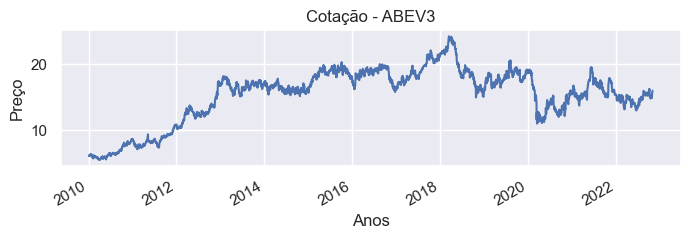

In [74]:
cotaabev3 = abev3["Close"].plot(figsize=(8,2))
plt.title("Cotação - ABEV3")
plt.xlabel("Anos")
plt.ylabel("Preço")

Date
2010-01-04    3.037233
2010-01-05    1.243332
2010-01-06    1.840695
2010-01-07    0.321138
2010-01-08    0.580639
2010-01-11   -2.172527
2010-01-12    0.655887
2010-01-13    1.290322
2010-01-14    2.735306
2010-01-15   -1.113401
dtype: float64

Text(0, 0.5, 'Volatilidade %')

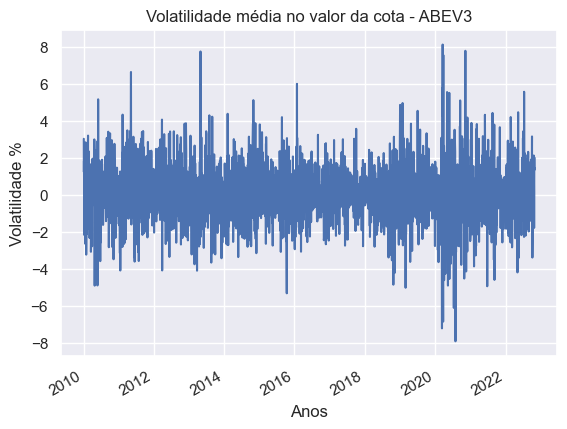

In [75]:
pct_abev3 = (abev3.Close / abev3.Open).apply(lambda x:x-1)*100
display(pct_abev3.head(10))
pct_abev3.plot()
plt.title("Volatilidade média no valor da cota - ABEV3")
plt.xlabel("Anos")
plt.ylabel("Volatilidade %")

In [76]:
ftsabev3 = fts.get_fundamentos('ABEV3')

In [83]:
type(ftsabev3)

pandas.core.frame.DataFrame

In [82]:
print(ftsabev3)
print(type(ftsabev3))

                     Mercado                                           \
ABEV3 Quantidade de Ações ON Quantidade de Ações PN Última Cotação ON   
Data                                                                    
                         NaN                    NaN               NaN   
2012               1755466.0              1372093.0             16.74   
2013              15664280.0                    NaN             17.32   
2014              15712619.0                    NaN             16.35   
2015              15717615.0                    NaN             17.85   
2016              15717615.0                    NaN             16.40   
2017              15717615.0                    NaN             21.28   
2018              15722147.0                    NaN             15.38   
2019              15722718.0                    NaN             18.67   
2020              15722718.0                    NaN             15.65   

                        Resultados                

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
[46471.0, 9557324.0, 12065512.0, 12423771.0, 12546610.0, 7268959.0, 10994961.0, 11779965.0, 11379394.0]


Text(0, 0.5, 'Valores - [?]')

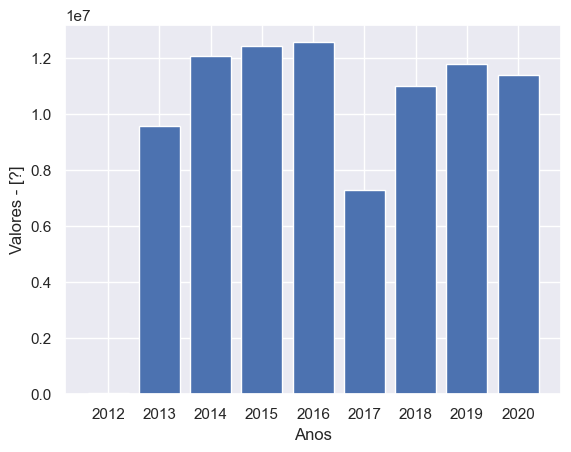

In [81]:
x = ftsabev3['Resultados'].to_dict()

LLdata = list(x['Lucro Líquido'].keys())
LLdata.pop(0)
LLvalores = list(x['Lucro Líquido'].values())
LLvalores.pop(0)

print(LLdata)
print(LLvalores)

plt.bar(LLdata, LLvalores)
plt.xlabel("Anos")
plt.ylabel("Valores - [?]")